In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


g = []
gearbox_initial = []

feature_names = ['sensor1', 'sensor2', 'sensor3', 'sensor4']
color = ['red', 'green', 'blue', 'yellow', 'black']

for i in range(5):
    gearbox_initial.append(pd.read_excel('附件1.xlsx', i, dtype=np.float32))
    gearbox_initial[i]['target'] = i
    g.append(gearbox_initial[i].to_numpy())

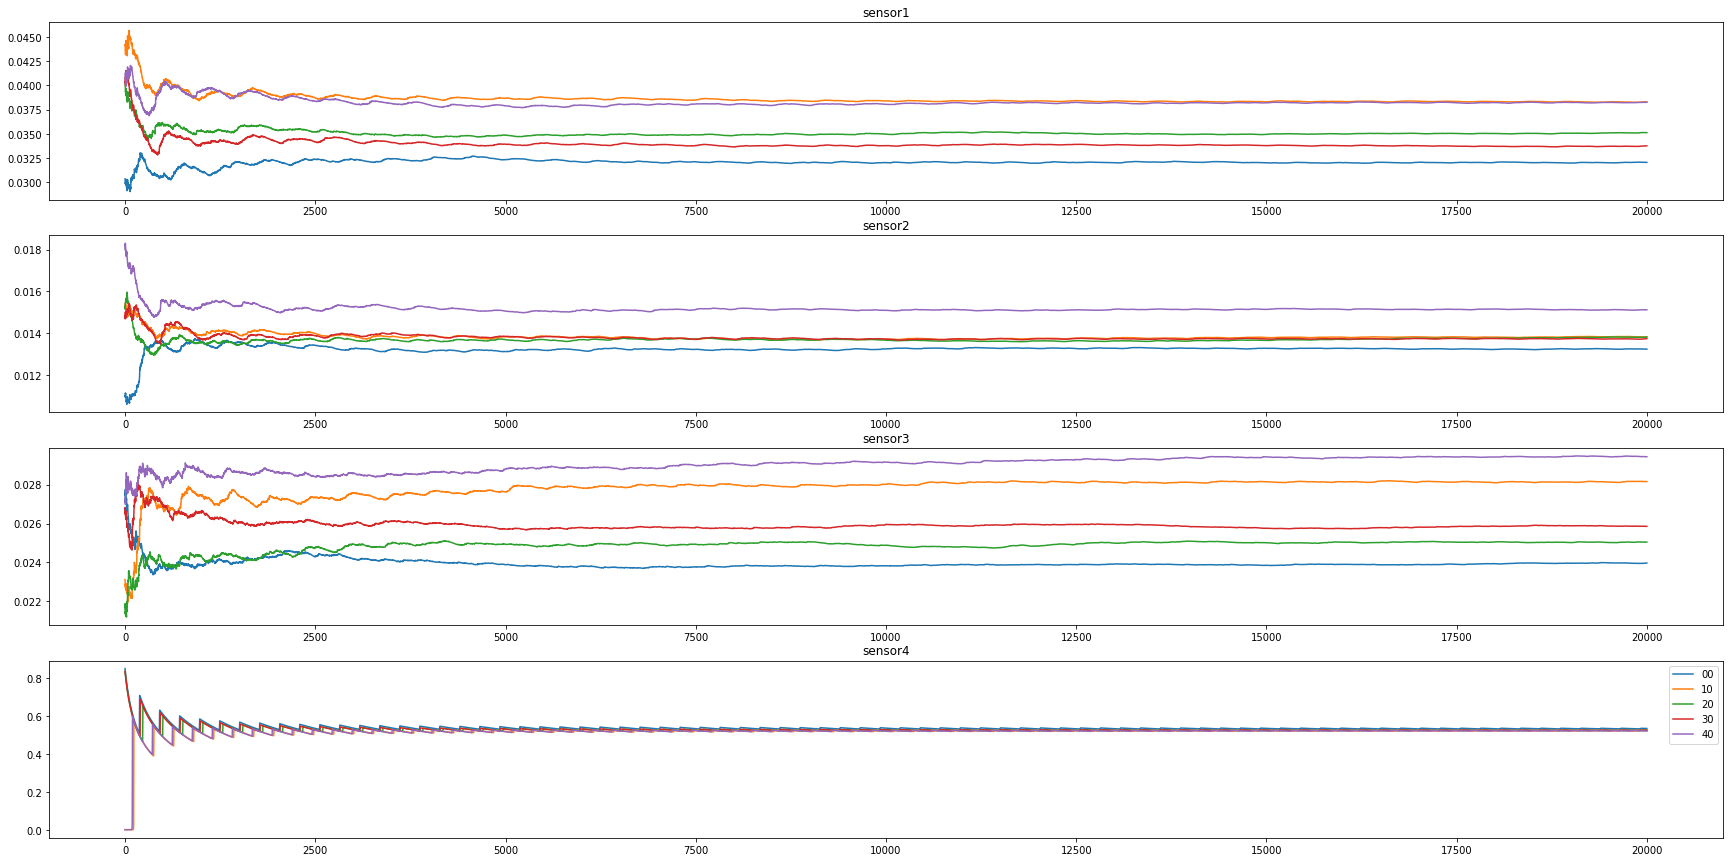

In [26]:
# 标准差图像绘制
_, axes = plt.subplots(4,1,figsize=(30,15))
length, start = 500, 100
for j, ax in enumerate(axes):
    for i in range(5):
        ax.plot(range(length),g[i][start: start+length, j+5])
        ax.set_title(feature_names[j])
plt.legend(['00', '10', '20', '30', '40'])
plt.show()

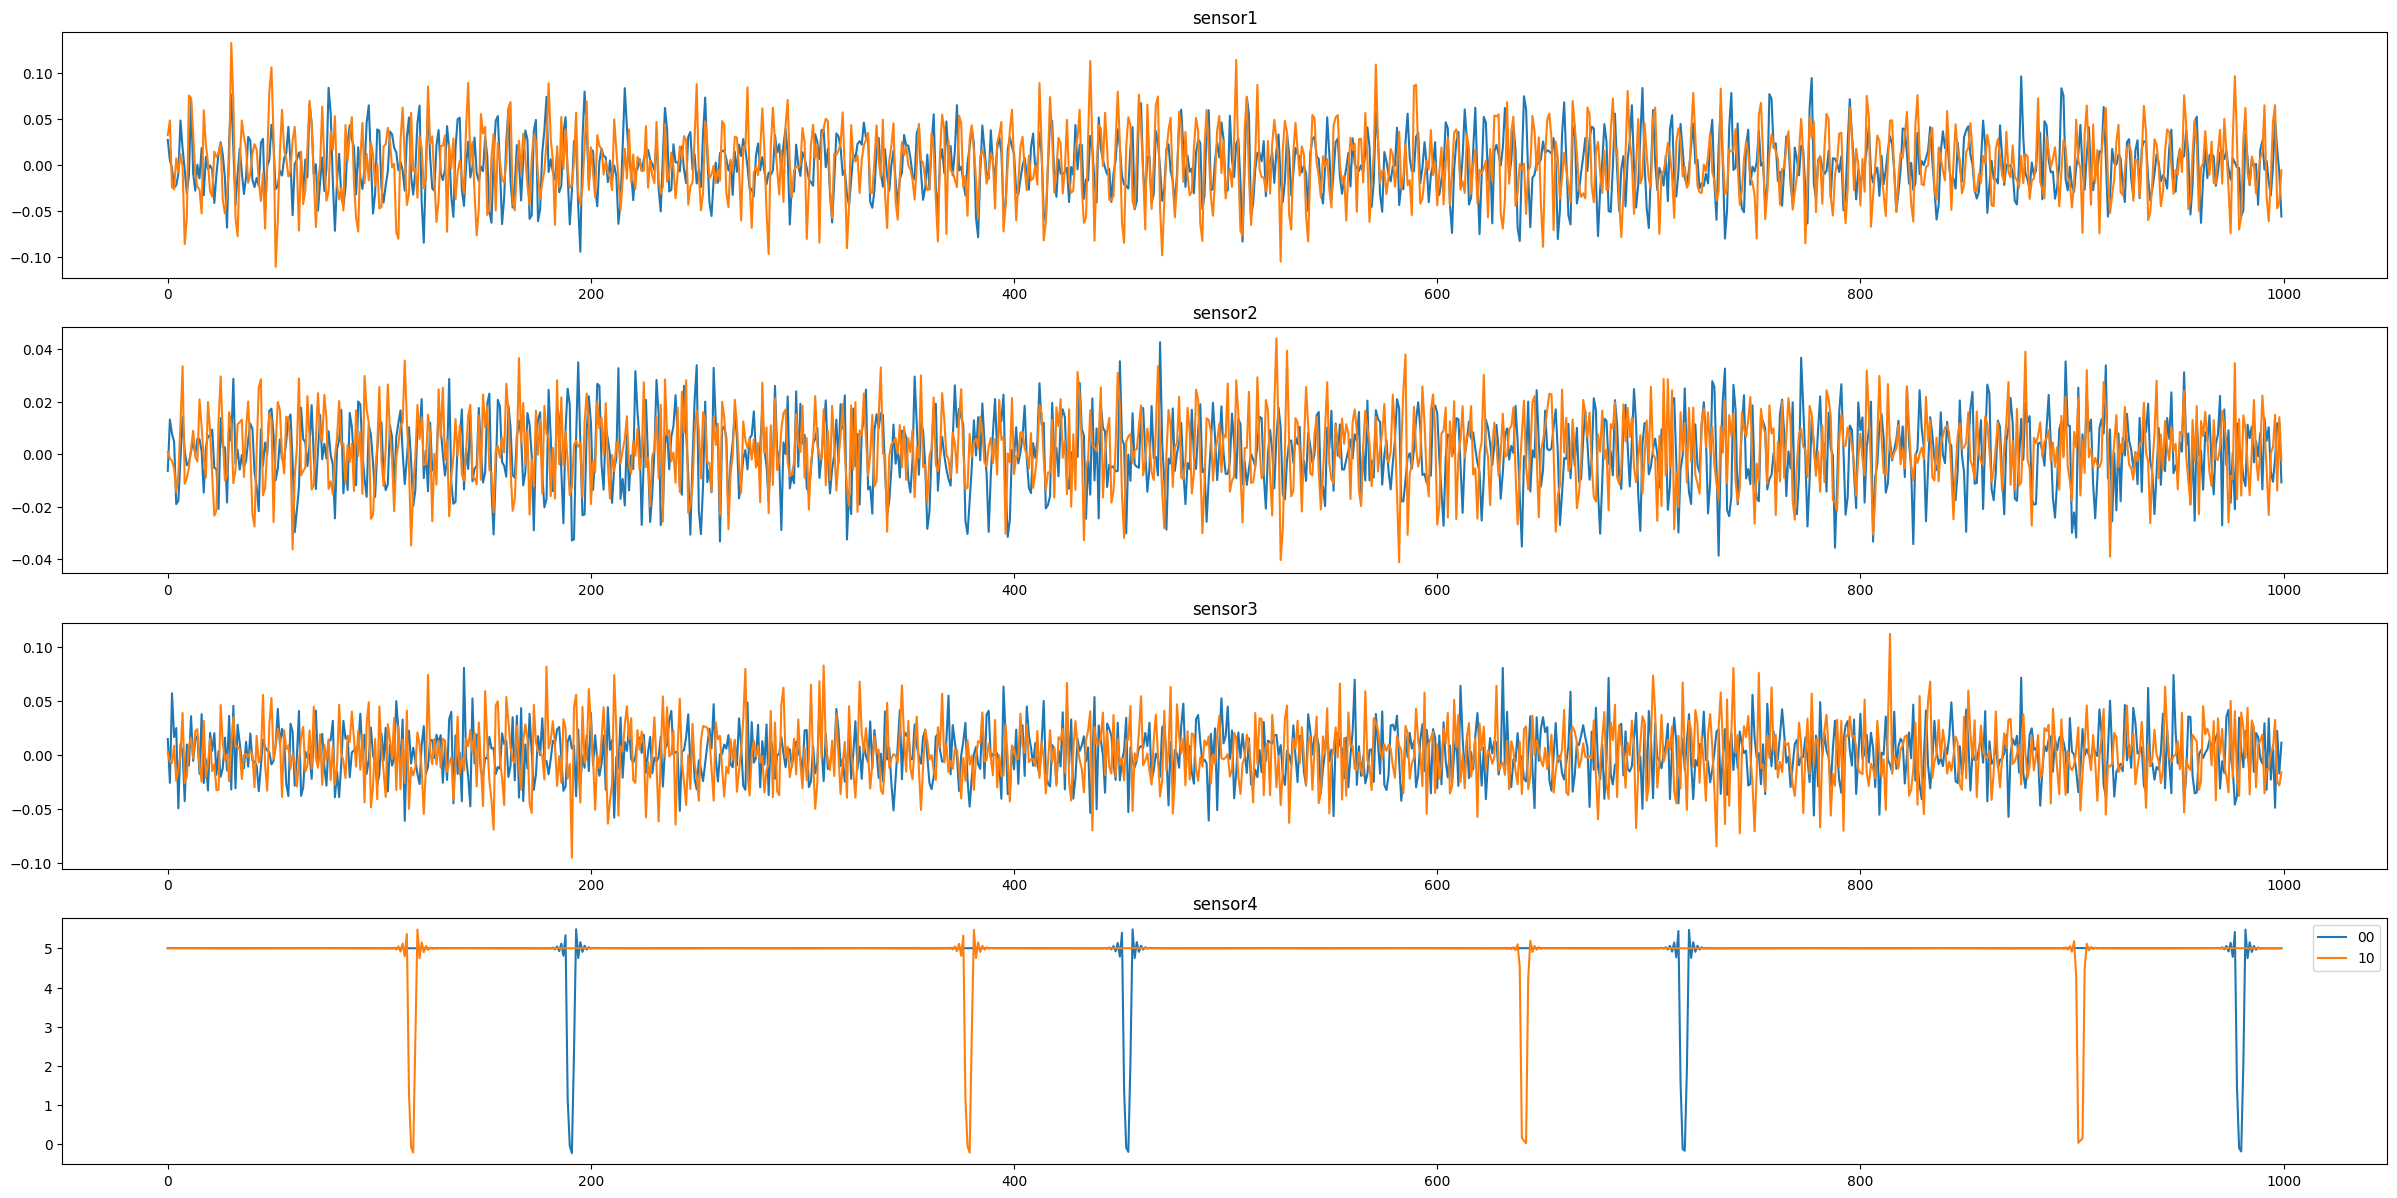

In [29]:
# 原始图像绘制
_, axes = plt.subplots(4,1,figsize=(30,15), dpi=100)
length, start = 1000, 100
for j, ax in enumerate(axes):
    for i in range(2):
        ax.plot(range(length),g[i][start: start+length, j+1])
        ax.set_title(feature_names[j])
plt.legend(['00', '10', '20', '30', '40'])
plt.show()

In [82]:
# 01标准化

import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

class VarianceSelect():
    def __init__(self):
        pass
    # 将数据进行0-1标准化
    def MaxMinTransform(self,data):
        for var_name in data.columns:
            mi = data[var_name].min()
            ma = data[var_name].max()
            data[var_name] = data[var_name].apply(lambda x: (x - mi) / (ma - mi))
        return data
    # 方差特征筛选
    def VarianceFunc(self,data_final):
        selector = VarianceThreshold(threshold=0.01)
        result_select = selector.fit_transform(data_final)
        result_support = selector.get_support(indices=True)
        return result_select,result_support
    # 加载及调用
    def load_transform(self):

        print('查看初始数据 : ', data.head())
        print('查看各变量均值方差 : ', np.mean(data.iloc[:, :]), np.var(data.iloc[:, :]))

        data_final = self.MaxMinTransform(data.iloc[:, :])
        print('查看0-1标准化后数据 : ', data_final.head())
        print('标准化后查看各变量均值方差 : ', np.mean(data_final), np.var(data_final))

        result_select, result_support = self.VarianceFunc(data_final)
        print('筛选方差大于0.01的特征 : ', result_select)
        print('方差筛选后保留特征索引 : ', result_support)



In [1]:
# 原始数据读取（未经处理）
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


g = []
gearbox_initial = []

feature_names = ['sensor1', 'sensor2', 'sensor3', 'sensor4']
color = ['red', 'green', 'blue', 'yellow', 'black']

for i in range(5):
    gearbox_initial.append(pd.read_excel('原始数据未处理.xlsx', i, dtype=np.float32))
    gearbox_initial[i]['target'] = i



In [101]:
import pandas as pd

boxes = ['gearbox00', 'gearbox10', 'gearbox20', 'gearbox30', 'gearbox40']
for i in range(5):
    print('*'*50)
    print("对于{}".format(boxes[i]))

    data = gearbox_initial[i].iloc[:500, 1:5]
    VarianceSelect().load_transform()

    print('\n\n')


**************************************************
对于gearbox40
查看初始数据 :      sensor1   sensor2   sensor3  sensor4
0  0.026281 -0.006297  0.039016  5.00475
1  0.032172  0.000813 -0.004594  5.00500
2 -0.053078  0.025422 -0.017453  5.00500
3 -0.053813 -0.004531 -0.023984  5.00500
4 -0.005984 -0.010328  0.069359  5.00500
查看各变量均值方差 :  sensor1    0.000522
sensor2   -0.000128
sensor3    0.000682
sensor4    4.938855
dtype: float32 sensor1    0.001444
sensor2    0.000219
sensor3    0.000806
sensor4    0.286947
dtype: float32
查看0-1标准化后数据 :      sensor1   sensor2   sensor3   sensor4
0  0.659758  0.454435  0.697613  0.913777
1  0.686064  0.533264  0.427978  0.913821
2  0.305351  0.806133  0.348469  0.913821
3  0.302072  0.474013  0.308086  0.913821
4  0.515664  0.409737  0.885228  0.913821
标准化后查看各变量均值方差 :  sensor1    0.544722
sensor2    0.522831
sensor3    0.460598
sensor4    0.902134
dtype: float64 sensor1    0.028801
sensor2    0.026918
sensor3    0.030796
sensor4    0.008958
dtype: float64
筛选方差

c:\Users\LeonardoZhou\PycharmProjects\长三角数学建模\venv\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\LeonardoZhou\PycharmProjects\长三角数学建模\venv\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


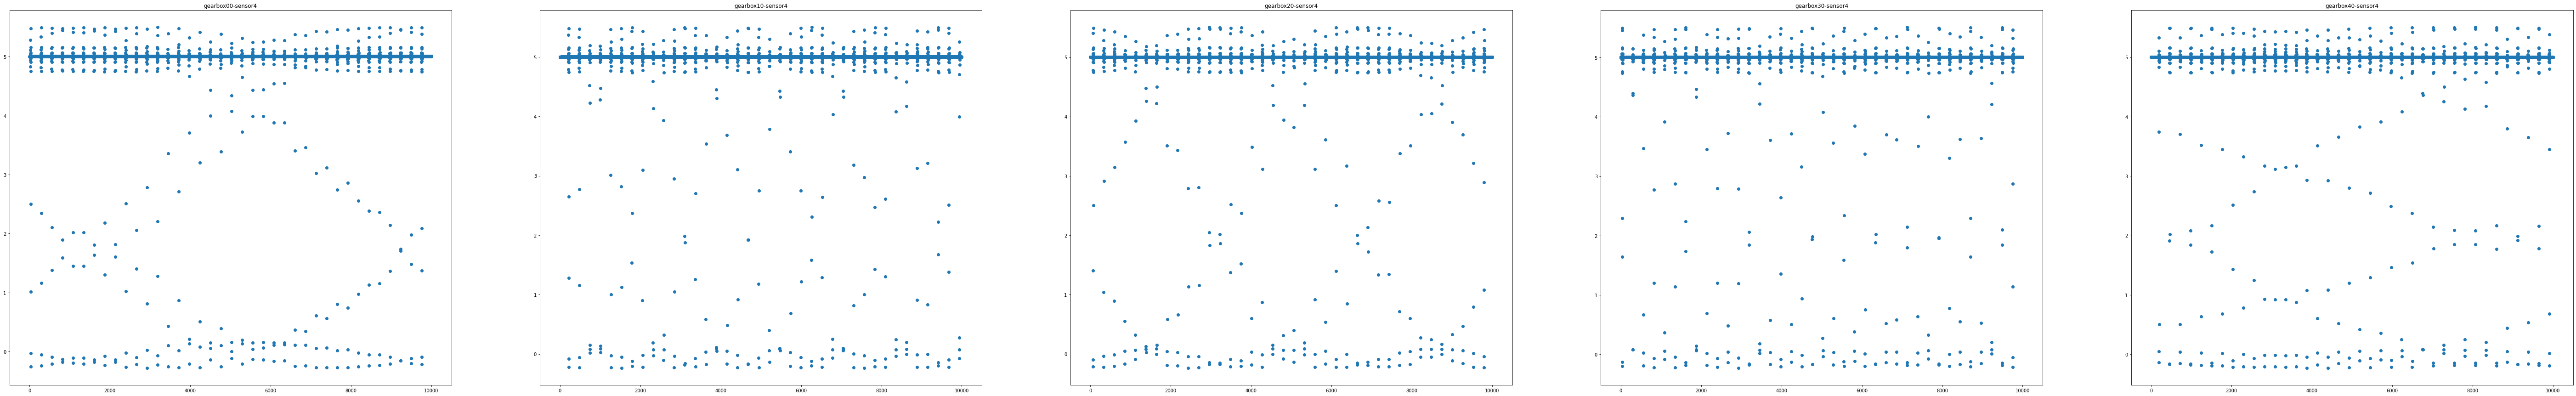

In [72]:
# 绘制各个散点图
boxes = ['gearbox00', 'gearbox10', 'gearbox20', 'gearbox30', 'gearbox40']
feature_names = ['sensor1', 'sensor2', 'sensor3', 'sensor4']

fig, axes = plt.subplots(1,5,figsize=(100,15))
length, start = 10000, 0

# for i in range(4):
i = 3
for j,ax_ in enumerate(axes):
    ax_.scatter(range(length), gearbox_initial[j][feature_names[i]][start: start+length])
    ax_.set_title('{}-{}'.format(boxes[j],feature_names[i]))
plt.savefig('{}.png'.format(feature_names[i]))
plt.show()

In [14]:
import pywt

wp = pywt.WaveletPacket(data=gearbox_initial[0]['sensor1'][:500], wavelet='db1',mode='symmetric',maxlevel=4)

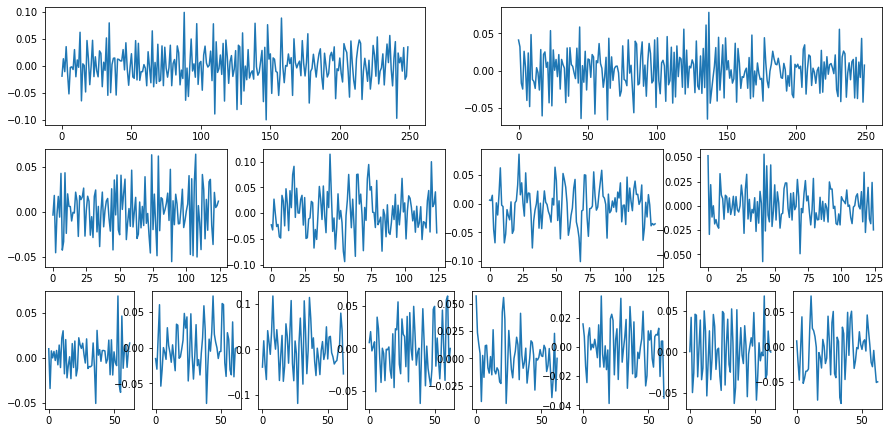

In [117]:
# 小波分析成分

a = wp['a'].data #第1个节点

d = wp['d'].data #第2个节点#第二层

aa = wp['aa'].data

ad= wp['ad'].data

dd= wp['dd'].data

da= wp['da'].data#第三层

aaa = wp['aaa'].data

aad= wp['aad'].data

ada= wp['add'].data

add= wp['ada'].data

daa= wp['dda'].data

dad= wp['ddd'].data

dda= wp['dad'].data

ddd= wp['daa'].data

plt.figure(figsize=(15, 10))

plt.subplot(4,2,3)

plt.plot(a)

plt.subplot(4,2,4)

plt.plot(d)#第二层

plt.subplot(4,4,9)

plt.plot(aa)

plt.subplot(4,4,10)

plt.plot(ad)

plt.subplot(4,4,11)

plt.plot(dd)

plt.subplot(4,4,12)

plt.plot(da)#第三层

plt.subplot(4,8,25)

plt.plot(aaa)

plt.subplot(4,8,26)

plt.plot(aad)

plt.subplot(4,8,27)

plt.plot(add)

plt.subplot(4,8,28)

plt.plot(ada)

plt.subplot(4,8,29)

plt.plot(dda)

plt.subplot(4,8,30)

plt.plot(ddd)

plt.subplot(4,8,31)

plt.plot(dad)

plt.subplot(4,8,32)

plt.plot(daa)

plt.show()

In [118]:
def wpd_plt(signal,n):#wpd分解

    wp = pywt.WaveletPacket(data=signal, wavelet='db1',mode='symmetric',maxlevel=n)#计算每一个节点的系数，存在map中，key为'aa'等，value为列表

    map ={}

    map[1] =signal
    for row in range(1,n+1):

        lev=[]
        for i in [node.path for node in wp.get_level(row, 'freq')]:

            map[i]=wp[i].data#作图

    plt.figure(figsize=(15, 10))

    plt.subplot(n+1,1,1) #绘制第一个图

    plt.plot(map[1])
    for i in range(2,n+2):

        level_num= pow(2,i-1) #从第二行图开始，计算上一行图的2的幂次方

    #获取每一层分解的node：比如第三层['aaa', 'aad', 'add', 'ada', 'dda', 'ddd', 'dad', 'daa']

        re = [node.path for node in wp.get_level(i-1, 'freq')]
        for j in range(1,level_num+1):

            plt.subplot(n+1,level_num,level_num*(i-1)+j)

            plt.plot(map[re[j-1]]) #列表从0开始

In [ ]:
wpd_plt(gearbox_initial[0]['sensor1'][:500], 4)

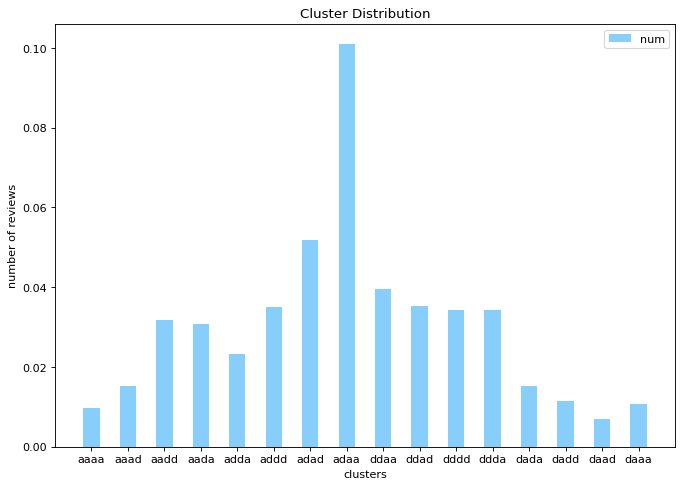

In [15]:
n = 3
re= []
tmp = wp.get_level(4, 'freq')
temp = [node.path for node in tmp]
for i in temp:
    re.append(wp[i].data)

energy =[]

for i in re:
    energy.append(pow(np.linalg.norm(i,ord=None),2))

plt.figure(figsize=(10, 7), dpi=80)

N = len(re)
values=energy

index =np.arange(N)

width = 0.45



p2 = plt.bar(index, values, width, label="num", color="#87CEFA")

plt.xlabel('clusters')

plt.ylabel('number of reviews')

plt.title('Cluster Distribution')

xticks = []
for i in range(len(re)):
    xticks.append(' ')

plt.xticks(index, temp)

plt.legend(loc="upper right")

plt.show()